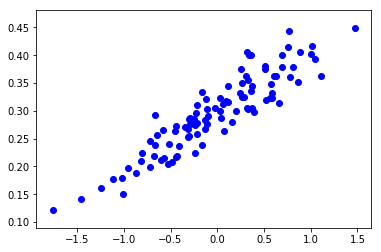

w= [-0.05967355] b= [0.] 0.09782689
w= [-0.00543974] b= [0.2950853] 0.005291401
w= [0.03502325] b= [0.29618457] 0.0026101675
w= [0.06077196] b= [0.29700473] 0.001524109
w= [0.07715964] b= [0.29752663] 0.0010841854
w= [0.08758953] b= [0.29785877] 0.00090598804
w= [0.0942276] b= [0.2980702] 0.0008338065
w= [0.09845238] b= [0.29820472] 0.0008045685
w= [0.10114123] b= [0.29829037] 0.00079272507
w= [0.10285254] b= [0.29834485] 0.0007879278
w= [0.10394169] b= [0.29837954] 0.00078598456
w= [0.10463488] b= [0.29840162] 0.00078519736
w= [0.10507606] b= [0.29841566] 0.0007848785
w= [0.10535685] b= [0.2984246] 0.0007847494
w= [0.10553556] b= [0.2984303] 0.00078469707
w= [0.10564929] b= [0.29843393] 0.0007846758
w= [0.10572168] b= [0.29843622] 0.0007846672
w= [0.10576776] b= [0.2984377] 0.0007846638
w= [0.10579707] b= [0.29843864] 0.0007846624
w= [0.10581574] b= [0.29843923] 0.0007846619
w= [0.10582761] b= [0.2984396] 0.0007846616


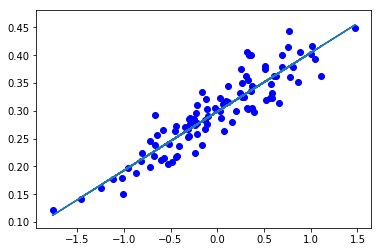

In [2]:
# coding:utf-8
# 一般线性回归预测
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 定义随机数据点100个
num_points = 100
vectors_set = []
for i in range(num_points):
 x = np.random.normal(0.0,0.55)
 y = x * 0.1 + 0.3 + np.random.normal(0.0,0.03)
 vectors_set.append([x,y])
# 特征x
x_data = [v[0] for v in vectors_set]
# 标签值y
y_data = [v[1] for v in vectors_set]
plt.scatter(x_data,y_data,c='b')
plt.show()
# 使用Variable定义学习参数
w = tf.Variable(tf.random_uniform([1],-1.,1.),name='myw')
b = tf.Variable(tf.zeros([1]),name='myb')
#经过计算得出预估值
y = w * x_data + b
#以预估值y和实际值y_data之间的均方差作为损失
loss = tf.reduce_mean(tf.square(y-y_data,name='mysquare'), name='myloss')
#采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss,name='mytrain')
#global_variables_initializer初始化Variable等变量
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print("w=", sess.run(w),"b=",sess.run(b),sess.run(loss))
#迭代20次train
for step in range(20):
 sess.run(train)
 print("w=", sess.run(w),"b=",sess.run(b),sess.run(loss))
#写入磁盘，提供tensorboard在浏览器中展示用
writer = tf.summary.FileWriter("./mytmp",sess.graph)
# 显示训练出的回归曲线
plt.scatter(x_data,y_data,c='b')
plt.plot(x_data,sess.run(w) * x_data + sess.run(b))
plt.show()
